## Predict number of insurance policies (regression)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
colnames = [ 'MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN'
,'MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO',
'MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045',
'MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG',
'PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND',
'AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

train_set = pd.read_csv('ticdata2000.txt', sep = "\t", names =colnames, header = None )

colnames1 = [ 'MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN'
,'MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO',
'MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045',
'MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG',
'PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND',
'AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND']


test_set = pd.read_csv('ticeval2000.txt', sep ="\t", names = colnames1) # for evaluation

colnames2 = ['CARAVAN' ]

test_label = pd.read_csv('tictgts2000.txt', sep = "\t", names = colnames2, header = None) 
pd.set_option('display.max_columns', None)

### EDA of 'train_set'

In [3]:
#train_set.head()

In [4]:
#train_set.info()

In [5]:
#train_set.isnull().sum()

<AxesSubplot:>

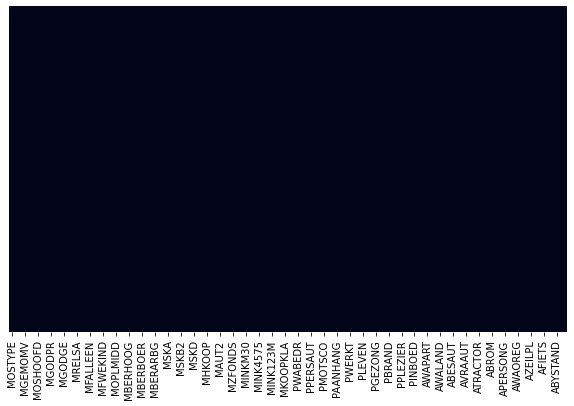

In [6]:
# Visualizing the NULL data using Seaborn HeatMap.
fig =plt.figure(figsize=(10,6))
sns.heatmap(train_set.isnull(), yticklabels = False, cbar = False)

### Insight #1

So far the data doesn't seem to have any null values. It's a great thing. Yay!

#---------

In [7]:
train_set.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### Hypothesis

People with high purchasing power are more likely to purchase the CARAVAN:Number of mobile home policies, since they have more disposable income, assuming that they will probaby use the mobile homes (RVs, vans or camping trailers) when they go for vacations or camping (a luxury that people with money tend to enjoy).

#### Statistical Modeling: Simple Regression 

In [8]:
import statsmodels.api as sm

## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(train_set.MKOOPKLA, prepend = False) # MKOOPKLA Purchasing power class

lm_mod = sm.OLS(train_set.CARAVAN, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CARAVAN   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     54.07
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.21e-13
Time:                        19:21:44   Log-Likelihood:                 146.13
No. Observations:                5822   AIC:                            -288.3
Df Residuals:                    5820   BIC:                            -274.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MKOOPKLA       0.0113      0.002      7.353      0.0

In [9]:
# Sample correlation
corr_mat = train_set[['MKOOPKLA', 'CARAVAN']].corr()
print(corr_mat)
corr_mat.iloc[1,0].round(3)

          MKOOPKLA   CARAVAN
MKOOPKLA  1.000000  0.095938
CARAVAN   0.095938  1.000000


0.096

Range of Purchasing power class = { 1 8}


Text(0.5, 0, 'Purchasing power class')

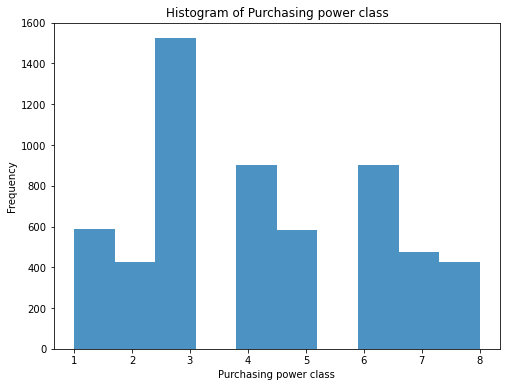

In [10]:
print('Range of Purchasing power class = { ' + str(min(train_set.MKOOPKLA)) + ' ' + str(max(train_set.MKOOPKLA)) + '}')

ax = plt.figure(figsize=(8, 6)).gca() # define axis
train_set.MKOOPKLA.plot.hist(ax = ax, alpha = 0.8)
plt.title('Histogram of Purchasing power class')
plt.xlabel('Purchasing power class')

#### Insight #2
The model coefficients are displayed in this summary. The intercept is shown as const. Thus, our regression equation is as follows:

CARAVAN:Number of mobile home policies = 0.0118 + 0.0113(MKOOPKLA)

With the above linear equation, and the R-squared value of 0.009 from the OLS model, there isn't enough statistical explanation to support that purchasing power class (people with higher income) could predict the purchase the mobile home policy (assuming it's RV, Vans, and camping trailers).

#### Interpretation of the OLS Results

First, to be clear, there are two parameters in the regression model: the intercept (shown as const) and the slope coefficient (shown as MKOOPKLA). Each exists in the population and we are estimating them in our sample.

This information is found in the middle of the table, where it says 'coef'. There are two rows, one for the intercept and one for the slope. We see. For our data, we estimate the intercept is 0.0118. However, this is just an estimate of the "real intercept" in the population. There is a standard error, t-test, and p-value (10.3%) (in R, called Pr(>|t|)) shown. As we see, the intercept is NOT significant, meaning that it's closer to "zero" 0.0118-precisely.  

More interesting is the slope for MKOOPKLA. We see that the slope is estimated at 0.0113. We also see that there is a t-test and p-value and again, we see that it is NOT significant p-value 10.3%. (Same information given to us by the 95% CI "grey band" in the graph above). This is useful information. This tells you that you cannot be confident that the slope is "not zero"...in other words, MKOOPKLA is NOT 'predicting' CARAVAN. The slope can also be interpreted directly. For each unit of MKOOPKLA, we expect CARAVAN to change by 0.0113 units.

#### Residuals

Residuals are the difference between the actual value and the predicted value. One powerful method for understanding residuals is to make a scatter plot with the residual values on the vertical axis and the predicted values or Score on the horizontal axis. This type of display is known as a residual plot. The code in the cell below computes predicted or score values, computes residuals and creates the residual plot:

In [11]:
## Create a new data frame with the predictor value and the constant
new_predict = train_set.MKOOPKLA
new_predict = sm.add_constant(new_predict, prepend = False)
## Make prediction with new values
new_predict['Score'] = res.predict(new_predict)

## Compute the residuals 
new_predict['Residuals'] = train_set.CARAVAN - new_predict.Score
new_predict['Residuals'].mean()

-3.614970645816045e-17

Text(0.5, 0, 'Predicted values')

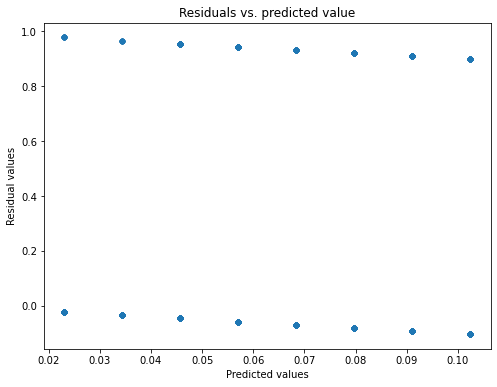

In [12]:
# Plotting Residuals
ax = plt.figure(figsize=(8, 6)).gca() # define axis
new_predict.plot.scatter(x='Score',y='Residuals', ax = ax)
plt.title('Residuals vs. predicted value')
plt.ylabel("Residual values")
plt.xlabel('Predicted values')

There are two points to notice about the residual plot. First, the residual value are generally in a small range, however, in this case, they are NOT centered around zero. Second, there does appear to be dispersion (distribution) of the residuals as the predicted score changes. These observations indicate that the MKOOPKLA is NOT a good predictor of who would purchase CARAVAN insurance policies.

#--------

#### Further Exploration

1. Visualization of CARAVAN insurance purchases distribution
2. The Customer subtypes distribution

<AxesSubplot:title={'center':'Classifying Customer Subtypes'}>

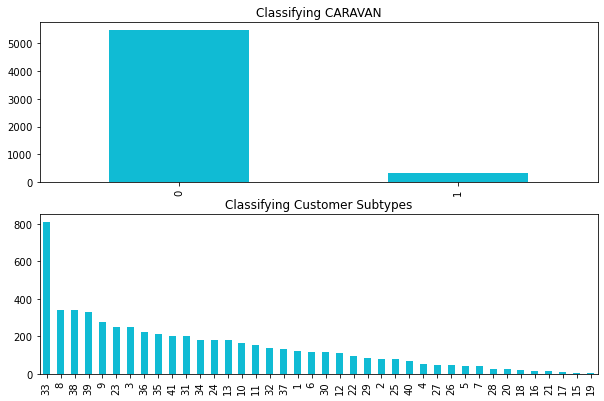

In [13]:
# Visualization: Classifying CARAVAN feature and Customer Subtypes

fig=plt.figure(figsize =(10,10))

#Plot telling the total count of different values in CARAVAN policies purchased
plt.subplot(3,1,1)
train_set['CARAVAN'].value_counts().plot(kind='bar',title='Classifying CARAVAN', color='#10bbd4', grid=False)

#Plot telling the total count of different values in customer subtype
plt.subplot(3,1,2)
train_set['MOSTYPE'].value_counts().plot(kind='bar',align='center',title='Classifying Customer Subtypes', 
                                         color='#10bbd4', grid=False)

#### Insight #3

1. Lower class large families customer subtypes (33) constitute the large number of population.
2. Negligible number of customers bought CARAVAN mobile home policies

#-----------

### Exploratory Data Analysis of that test set

1. Examining the data frame and the 1-dimension Series: No Null values. No need to bother to check for duplicates because there isn't column that has unique values eg. customerID 
2. Creating a combined data frame for the training set and visualize the NULL data using Seaborn HeatMap 

In [14]:
test_set.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
test_label.head()

,CARAVAN
0,0
1,1
2,0
3,0
4,0


#### Creating a 'test_set' DataFrame

In [16]:
test_set = pd.concat([test_set, test_label], axis = 1, join = 'outer')
test_set.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
# Inspecting for NUll values
#test_set.isnull().sum()

<AxesSubplot:>

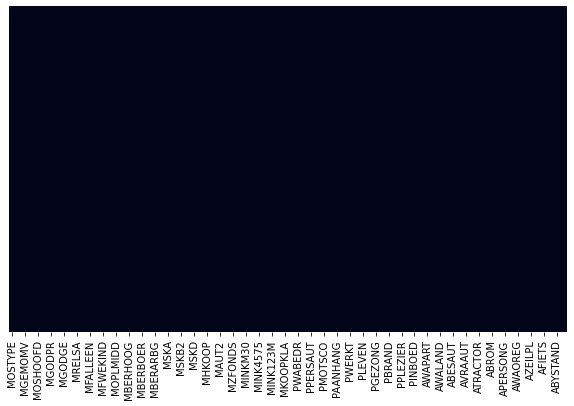

In [18]:
# Visualizing the NULL data using Seaborn HeatMap.
fig =plt.figure(figsize=(10,6))
sns.heatmap(test_set.isnull(), yticklabels = False, cbar = False)

#---------------

#### ... Going back to the Traing Dataset 

Sample Heatmap

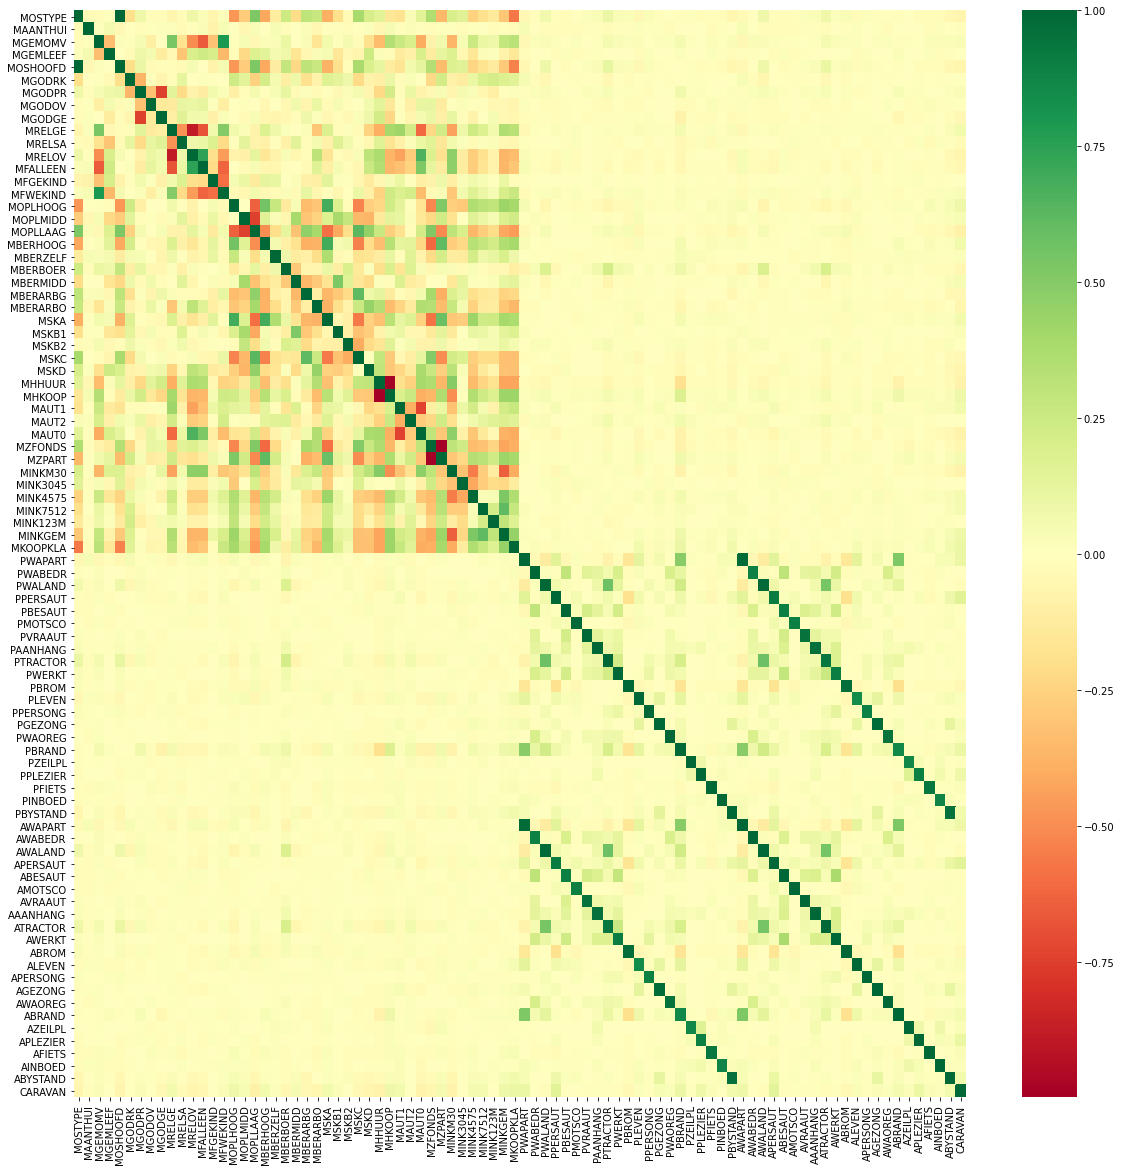

In [19]:
#get correlations of each features in dataset
corrmat = train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
grf=sns.heatmap(train_set[top_corr_features].corr(),annot=False,cmap="RdYlGn")

<AxesSubplot:>

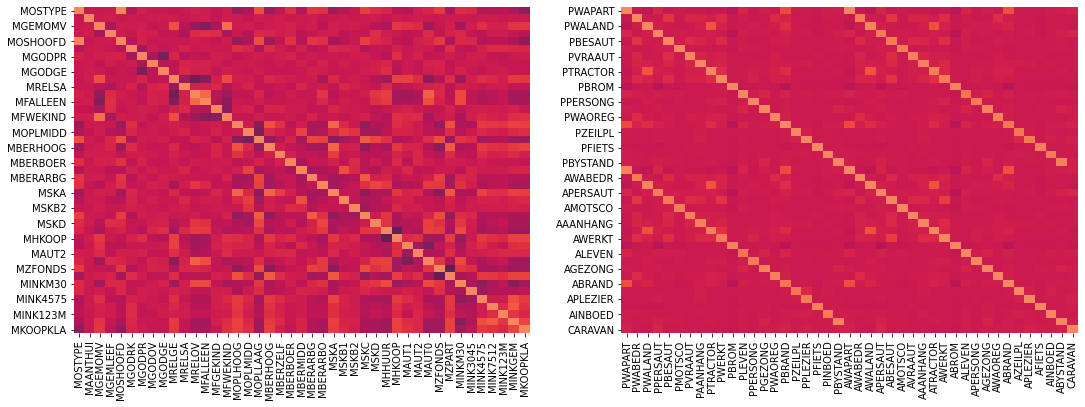

In [20]:
'''
Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) 
and product ownership (attributes 44-86) 

# Attribute 43 in 1-43 scale would then be 42 in 0-43 scale; remember, [43] is exlusive!
'''

f,axs = plt.subplots(1,2, figsize =(18,6))
sns.heatmap(train_set.iloc[:, :43].corr(), ax = axs[0], vmin = -2, vmax = 2, cbar =None)
sns.heatmap(train_set.iloc[:, 43:].corr(), ax = axs[1], vmin = -2, vmax = 2, cbar =None)


#### Observatons

1. No Null values
2. Numerical columns have less values while categorical columns are having larger values
3. Numerical & categorical features shows correlation within groups


#-------------

#### Exploratory Data Analysis of labels

1. The CARAVAN label in train set
2. The CARAVAN label in test set

In [21]:
# Get the count of Train and Test data
display(train_set.CARAVAN.value_counts(normalize=True), test_set.CARAVAN.value_counts(normalize=True))

0    0.940227
1    0.059773
Name: CARAVAN, dtype: float64

0    0.9405
1    0.0595
Name: CARAVAN, dtype: float64

#### Insights from NULL Hypothesis

From the above stats, it appears that only about 6 percent of sample population bought the CARAVAN insurance policy from both the training set and the test set. 

##### How close can ML model prediction come close to the 6-Percent that bought the policy?

#--------------

#### Graphical Representaion

<AxesSubplot:title={'center':'CARAVAN Classification Test Data'}>

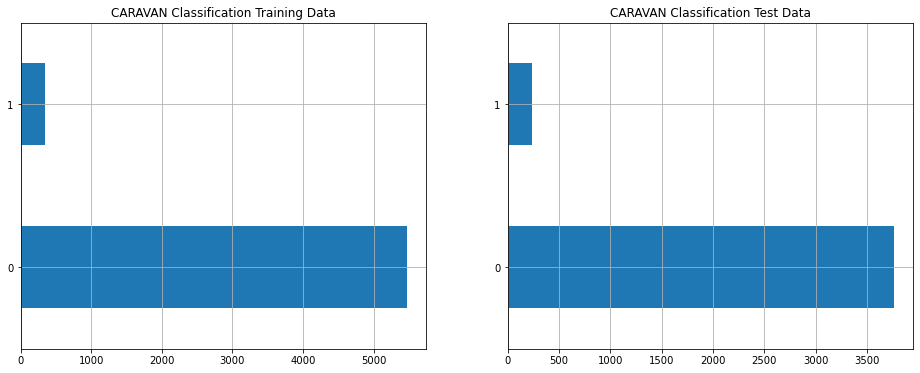

In [22]:
f,axs = plt.subplots(1,2, figsize =(16,6))
train_set.CARAVAN.value_counts().plot(kind='barh', ax=axs[0], title='CARAVAN Classification Training Data', grid = True)
test_set.CARAVAN.value_counts().plot(kind='barh', ax=axs[1], title='CARAVAN Classification Test Data', grid = True)

#### Observatons

1. No Null values
2. Data is imbalanced, too few obervations for CARAVAN=1


#---------------

### Q. 1. How close can ML model prediction come close to the 6-Percent that bought the policy?

#### How did I address data imbalance, categorical data, and dimensionality issues for Machine learning?

##### Preprocessing Steps

Tools
1. OneHotEncoder to treat the categorical columns ['MOSTYPE', 'MOSHOOFD']
2. SMOTETomek to treat the class imbalance
3. Principle Component Analysis (PCA) to reduce data dimensionality
4. StandardScaler (ssl) to provide scaling to the entire dataframe???

##### Later

1. Create the Column Transformer that accepts the treated columns
2. Create a pipeline that includes the Column Transformer, the Estimator Model
3. Use sklearn Cross_Val_Score to determine the accuracy of both the pre-process and pipeline stages.
4. Compare the Cross_Val_Score vs. the Null score performance


In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.metrics import classification_report_imbalanced

from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ssl
#from sklearn.preprocessing import OneHotEncoder

# Classifiers
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.naive_bayes import GaussianNB as gnb


# Preprocessing Tools
num_cols = [train_set.columns.values[43:]]
ssl = ssl(num_cols)
pca = PCA(.9)
smt = SMOTETomek(random_state=42)
#enc = ['MOSTYPE', 'MOSHOOFD']
#ohe = OneHotEncoder(enc)


# Models (Estimators)
knn = KNN()
rfc = rfc()
lgr = lgr()    
gnb = gnb()

from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Model Performance matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score




In [24]:
# Split train_set into Train and valid dataset, on which we will train our model. Let's get our X and y first
X = train_set.drop(['CARAVAN'], axis = 1) 
y = train_set['CARAVAN'] #iloc[:,-1] 

#display(X.head(), y.head())

In [25]:
# Split the train_set into 2 dataframes aka X_train, X_valid, y_train, y_valid

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
#print(test_set.shape)

(4075, 85) (4075,)
(1747, 85) (1747,)


#### ...Let's leave the test set alone for now

In [26]:
# Split the test_set
#X_test = test_set.drop(['CARAVAN'], axis = 1)
#y_test = test_set['CARAVAN']
#print(X_test.shape, y_test.shape)

#--------------------------

#### Exploring the imbalance data on the predictor

In [27]:
# Original data Imbalance
#print('Imbalanced Sample')
#y_train.value_counts()

In [28]:
# Oversampling Method results
#print('Over_sampled Sample')
#sm_trainX, sm_trainY = SMOTE(random_state = 45).fit_resample(X_train,y_train)
#sm_trainY.value_counts()

In [29]:
# Undersampling Method results
#print('Under_Sampled Sample')
#tm_trainX, tm_trainY = TomekLinks().fit_resample(X_train,y_train)
#tm_trainY.value_counts()

In [30]:
#print('Combine_sampled Sample')
cmb_trainX, cmb_trainY = SMOTETomek(random_state = 45).fit_resample(X_train,y_train)
cmb_trainY.value_counts()

1    3787
0    3787
Name: CARAVAN, dtype: int64

#-----------

### Model Building 1 --Assuming a Classification problem

#----------

In [31]:
# Pipeline the pre-process using KNN

pipeline_knn = Pipeline([('smt', smt), ('ssl', ssl), ('pca', pca), ('knn', knn)]) # ('ssl', ssl),
pipeline_knn.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTETomek(random_state=42)),
                ('ssl',
                 StandardScaler(copy=[array(['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND', 'CARAVAN'], dtype=object)])),
                ('pca', PCA(n_components=0.9)),
                ('knn', KNeighborsClassifier())])

In [32]:
# Prediction
y_hat = pipeline_knn.predict(X_valid)
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1639
           1       0.07      0.26      0.11       108

    accuracy                           0.75      1747
   macro avg       0.51      0.52      0.48      1747
weighted avg       0.89      0.75      0.81      1747



#### CROSS-Validation  approach

In [33]:
cross_val_score(pipeline_knn, X_train,y_train, cv=5, scoring= 'accuracy').mean()

0.7619631901840491

#----------

In [34]:
# Pipeline the pre-process using rfc
pipeline_rfc = Pipeline([('smt', smt), ('ssl', ssl), ('pca', pca), ('rfc', rfc)])
pipeline_rfc.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTETomek(random_state=42)),
                ('ssl',
                 StandardScaler(copy=[array(['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND', 'CARAVAN'], dtype=object)])),
                ('pca', PCA(n_components=0.9)),
                ('rfc', RandomForestClassifier())])

In [35]:
# Prediction
y_hat = pipeline_rfc.predict(X_valid)
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1639
           1       0.07      0.06      0.07       108

    accuracy                           0.89      1747
   macro avg       0.50      0.50      0.50      1747
weighted avg       0.89      0.89      0.89      1747



#### CROSS-Validation  approach

In [36]:
cross_val_score(pipeline_rfc, X_train,y_train, cv=5, scoring= 'accuracy').mean()

0.9038036809815951

#----------

In [37]:
# Pipeline the pre-process using logistic regression using SMOTE pipeline
pipeline_lgr = Pipeline([('smt', smt), ('ssl', ssl), ('pca', pca), ('lgr', lgr)])
pipeline_lgr.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTETomek(random_state=42)),
                ('ssl',
                 StandardScaler(copy=[array(['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND', 'CARAVAN'], dtype=object)])),
                ('pca', PCA(n_components=0.9)), ('lgr', LogisticRegression())])

In [38]:
# Prediction
y_hat = pipeline_lgr.predict(X_valid)
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1639
           1       0.09      0.39      0.15       108

    accuracy                           0.73      1747
   macro avg       0.52      0.57      0.50      1747
weighted avg       0.90      0.73      0.80      1747



#### CROSS-Validation  approach

In [39]:
cross_val_score(pipeline_lgr, X_train,y_train, cv=5, scoring= 'accuracy').mean()

0.7668711656441718

#---------

In [40]:
# Pipeline the pre-process using naive_bayes
pipeline_gnb = Pipeline([('smt', smt), ('ssl', ssl), ('pca', pca), ('gnb', gnb)])
pipeline_gnb.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTETomek(random_state=42)),
                ('ssl',
                 StandardScaler(copy=[array(['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND', 'CARAVAN'], dtype=object)])),
                ('pca', PCA(n_components=0.9)), ('gnb', GaussianNB())])

In [41]:
# Prediction
y_hat = pipeline_gnb.predict(X_valid)
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.38      0.55      1639
           1       0.06      0.62      0.11       108

    accuracy                           0.40      1747
   macro avg       0.50      0.50      0.33      1747
weighted avg       0.88      0.40      0.52      1747



#### CROSS-Validation  approach

In [42]:
cross_val_score(pipeline_gnb, X_train,y_train, cv=5, scoring= 'accuracy').mean()

0.40687116564417175

### Chaining Pipelines together

In [43]:
# Let's make the list of pipelines
pipelines = [pipeline_knn, pipeline_rfc, pipeline_lgr, pipeline_gnb]

In [44]:
# description of the results
best_accuracy = 0.0
best_classifier = 0
best_pipeline=''

In [45]:
# Dictionary of pipelines and classifier types fo ease of reference
pipe_dict = {0:'KNeighborsClassifier', 1:'RandomForestClassifier', 2:'LogisticRegression', 3:'GaussianNB'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#### Selecting Most Accurate Model (Estimator)

In [46]:
for i, model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i], model.score(X_valid, y_valid)))

KNeighborsClassifier Test Accuracy: 0.7481396680022896
RandomForestClassifier Test Accuracy: 0.884373211219233
LogisticRegression Test Accuracy: 0.732112192329708
GaussianNB Test Accuracy: 0.3995420721236405


In [47]:
for i, model in enumerate(pipelines):
    if model.score(X_valid, y_valid) > best_accuracy:
        best_accuracy = model.score(X_valid, y_valid)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: RandomForestClassifier


####  Using Pipeline to Perform Hyperparameter Tuning by Using Grid Search

In [48]:
# Create a pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs= -1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [49]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_valid,y_valid))

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=8, max_leaf_nodes=5,
                                        min_samples_leaf=2, n_estimators=10))])
The mean accuracy of the model is: 0.9381797366914711


### Interpretation of the Results
 
 The RandomForest Classifier has outperformed KNN, and Logistic Regression. It's accuracy went up from 89% to 94% after we performed hyperparameter tuning. This means that our model has predicted at approximately 94% accuracy of the given train set.
 
 Remember, only 6% of the sample population bought the insurance policy. In other words, the insurance company has sold the policy to only the 6% of the SAMPLE population. 

### Introducing TEST DATA

In [50]:
# Predicting from Test Data

# Split the test_set
X_test = test_set.drop(['CARAVAN'], axis = 1)
y_test = test_set['CARAVAN']


#best_model.fit(X_test, y_test)
best_model = gridsearch.fit(X_test,y_test)

In [51]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=2,
                                        n_estimators=10))])
The mean accuracy of the model is: 0.9405


#---------

### Model Building 2 -Assuming a Regression problem 

#------------------------------------------------- Regression Approach

#### Linear Regression Model

In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [53]:
# Using the 'valid' set to predict the model performance
Y_valid_pred_lr = linreg.predict(X_valid)
print(Y_valid_pred_lr)

[0.03668129 0.00119985 0.05409747 ... 0.00429148 0.11689983 0.11969135]


In [54]:
from sklearn import metrics  

print('Score:', metrics.mean_absolute_error(y_valid, Y_valid_pred_lr))
print('Coefficients:', linreg.coef_.mean())
print('Intercept:', linreg.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_valid, Y_valid_pred_lr))   # purnishes the errors
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, Y_valid_pred_lr)))
print('Coefficient of determination (R^2): %.2f'      # Percent of reduction in error from the null model (goodness of fit)
      % r2_score(y_valid, Y_valid_pred_lr))

Score: 0.11692202234939714
Coefficients: 0.0073246045692433115
Intercept: 0.965720984468625
Mean squared error (MSE): 0.06
RMSE: 0.24080636793316154
Coefficient of determination (R^2): 0.00


#### Scatter plot of Linear Regression

Text(0, 0.5, 'Predicted Y')

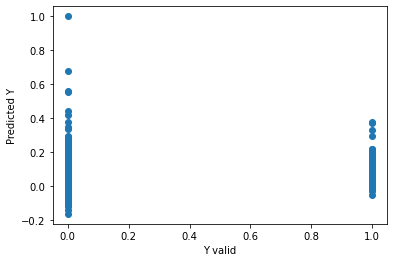

In [55]:
plt.scatter(y_valid,Y_valid_pred_lr)
plt.xlabel('Y valid')
plt.ylabel('Predicted Y')

#---------

#### RidgeCV model

In [56]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [57]:
# The 'valid'
Y_valid_pred_rdg = ridge.predict(X_valid)
print(Y_valid_pred_rdg)

[0.03335475 0.0019098  0.05166013 ... 0.00179391 0.11785267 0.11856968]


In [58]:
from sklearn import metrics  

print('Score:', metrics.mean_absolute_error(y_valid, Y_valid_pred_rdg))
print('Coefficients:', ridge.coef_.mean())
print('Intercept:', ridge.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_valid, Y_valid_pred_rdg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, Y_valid_pred_rdg)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_valid, Y_valid_pred_rdg))

Score: 0.11627578316817748
Coefficients: 0.0013823353130191127
Intercept: 0.5513814668445016
Mean squared error (MSE): 0.06
RMSE: 0.23884634981187508
Coefficient of determination (R^2): 0.02


#----------

#### Scatter Plot

Text(0, 0.5, 'Predicted Y')

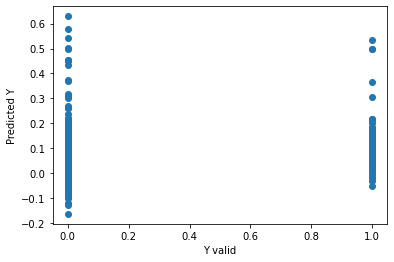

In [59]:
plt.scatter(y_valid, Y_valid_pred_rdg)
plt.xlabel('Y valid')
plt.ylabel('Predicted Y')

#----------

#### Bagging Regressor

In [60]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor(n_estimators=10, random_state=0)
bagg.fit(X_train,y_train)

BaggingRegressor(random_state=0)

In [61]:
# The 'valid'
Y_valid_pred_bar = bagg.predict(X_valid)
print(Y_valid_pred_bar)

[0. 0. 0. ... 0. 0. 0.]


In [62]:
from sklearn import metrics  

print('Score (MAE):', metrics.mean_absolute_error(y_valid, Y_valid_pred_bar))
#print('Coefficients:', bagg.coef_.mean())
#print('Intercept:', bagg.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_valid, Y_valid_pred_bar))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, Y_valid_pred_bar)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_valid, Y_valid_pred_bar))

Score (MAE): 0.11231444380843351
Mean squared error (MSE): 0.07
Root Mean Square Error (RMSE): 0.2604591430727699
Coefficient of determination (R^2): -0.17


Text(0, 0.5, 'Predicted Y')

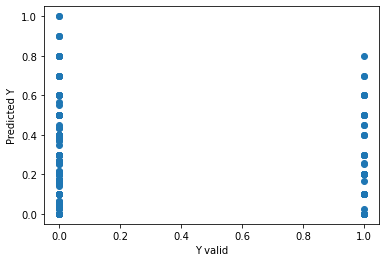

In [63]:
plt.scatter(y_valid, Y_valid_pred_bar)
plt.xlabel('Y valid')
plt.ylabel('Predicted Y')

#--------

####  Mean Square Error Method and r-squared score

In [64]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
# The 'valid'
Y_valid_pred_lr = lm.predict(X_valid)
print(Y_valid_pred_lr)

[0.03668129 0.00119985 0.05409747 ... 0.00429148 0.11689983 0.11969135]


In [66]:
#Print model performance
print('Coefficients:', lm.coef_.mean())
print('Intercept:', lm.intercept_)
print('MAE:', metrics.mean_absolute_error(y_valid, Y_valid_pred_lr))
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_valid, Y_valid_pred_lr))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, Y_valid_pred_lr)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_valid, Y_valid_pred_lr))

Coefficients: 0.0073246045692433115
Intercept: 0.965720984468625
MAE: 0.11692202234939714
Mean squared error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24080636793316154
Coefficient of determination (R^2): 0.00


#-------- 

#### Random Forest Regressor model

In [67]:
regressor = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800]


In [68]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [71]:
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=54, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   8.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   7.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   7.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   8.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   8.8s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, total=  33.5s
[CV] n_estimators=600, min_samples_split=15, min_s

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.7s
[CV] n_estimators=200, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=54, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

In [74]:
predictions=rf_random.predict(X_valid)
predictions.mean()

0.05784249308104544

In [75]:
# How well did our model do compared to null prediction?
y_valid.value_counts(normalize =True)

0    0.93818
1    0.06182
Name: CARAVAN, dtype: float64

<AxesSubplot:xlabel='CARAVAN'>

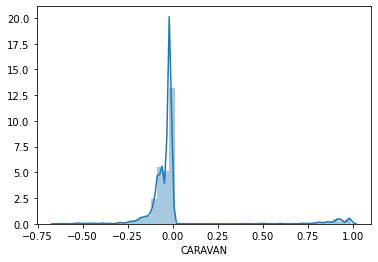

In [76]:
sns.distplot( y_valid - predictions)

<AxesSubplot:xlabel='CARAVAN'>

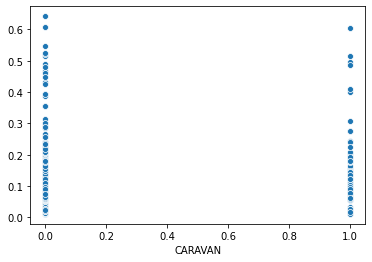

In [77]:
# Scatter plot of the y-valid and predictions( a function of X-valid)
sns.scatterplot(y_valid, predictions)

In [78]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

Mean Absolute Error (MAE): 0.10527456391799404
Mean Squared Error (MSE): 0.055826063214808805
Root Mean Squared Error (RMSE): 0.2362753969731271


#--------

#### ExtraTreeRegressor model - Feature Importance

In [79]:
### Feature Importance
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [80]:
print(model.feature_importances_)

[3.12101809e-02 6.02704850e-03 1.13833706e-02 1.52977869e-02
 2.15795557e-02 1.22091399e-02 1.92615353e-02 1.74400680e-02
 2.52464704e-02 1.09822643e-02 1.21414063e-02 1.12864635e-02
 1.36909186e-02 1.58929990e-02 1.56881828e-02 1.63983140e-02
 2.08770075e-02 1.70823566e-02 1.65368520e-02 1.81540048e-02
 8.65523134e-03 1.49063479e-02 1.68960536e-02 1.78712665e-02
 1.42826684e-02 1.41013341e-02 1.64988128e-02 1.59874825e-02
 1.30827692e-02 1.25779132e-02 1.40380100e-02 1.41118289e-02
 1.43765663e-02 1.22935637e-02 1.15346981e-02 1.24992097e-02
 1.32652121e-02 1.68268850e-02 1.37955374e-02 1.48413227e-02
 1.09158311e-02 1.18960832e-02 2.56392059e-02 3.43480202e-02
 6.96446134e-04 3.28937999e-04 4.21975571e-02 9.28794203e-04
 5.67812196e-03 3.50142730e-05 2.74867429e-03 2.48038494e-03
 2.33428487e-05 1.24990913e-02 1.13190728e-02 0.00000000e+00
 9.69138896e-04 1.23811089e-03 5.00358670e-02 7.88629956e-05
 6.33713418e-03 6.93923878e-03 5.31907662e-03 7.34075047e-03
 2.07308188e-02 6.215491

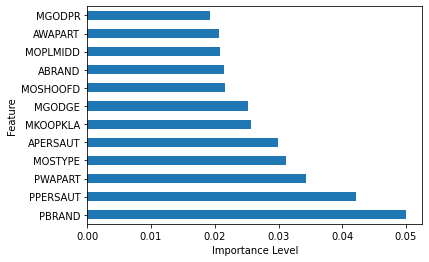

In [81]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh')#, stacked= True, color = '#10bbd4')
plt.xlabel('Importance Level')
plt.ylabel('Feature')
plt.show()

### Conclusion

The following are the important features to identify potential customers:
    
    1. Based on Demographic and Social Data
        a) MOSTYPE: Customer Subtype (Middle class families, Affluent young family may opt-in)
        b)MOSHOOFD: Customer main type(Customer main types 'Family with grown ups and driven Growers.')
        c)MKOOPKLA: Purchasing power class
        d)MOPLLAAG: Lower level education
        e)MOPLMIDD: Medium level education
            
    2. Based on Insurance Product Usage related data
        a)PBRAND: Contribution fire policies
        b)APERSAUT: Number of car policies
        c)PPERSAUT: Contribution car policies
        d)PWAPART:Contribution private third party insurance
        e)ABRAND: Number of fire policies

#--------------------------------

In [82]:
# References
# https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb
#https://nbviewer.jupyter.org/github/justmarkham/scikit-learn-tips/blob/master/notebooks/16_pipeline_cross_validation.ipynb
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
#https://www.kaggle.com/tatyanapinchuk/my-predicting-prices-of-avocados
#http://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html
#https://github.com/dataprofessor/code/blob/master/python/linear_regression.ipynb
#https://stackoverflow.com/questions/54515472/why-over-sampling-in-pipeline-explodes-the-number-of-model-coefficients
